# Z-scores

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
houses = pd.read_table("AmesHousing_1.txt")

In [4]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
houses['SalePrice'].sample(1, random_state = 0)

2216    220000
Name: SalePrice, dtype: int64

In [6]:
houses['SalePrice'].mean()

180796.0600682594

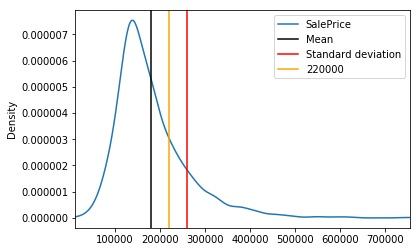

In [7]:
houses['SalePrice'].plot.kde(xlim=(min(houses['SalePrice']),max(houses['SalePrice'])))

plt.axvline(houses['SalePrice'].mean(), color='Black', label='Mean')
plt.axvline(houses['SalePrice'].mean() + houses['SalePrice'].std(ddof=0), color='Red', label='Standard deviation')
plt.axvline(220000, color='Orange', label='220000')
plt.legend()
plt.show()

A price of $220,000 is not very expensive!

In [8]:
sds_away = (220000-houses['SalePrice'].mean()) / houses['SalePrice'].std(ddof=0)
sds_away

0.4908280788718362

In [9]:
def z_score(value, array, bessel = 0):
    from numpy import std
    return (value - sum(array)/len(array)) / std(array, ddof = bessel)

In [10]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

In [11]:
min_z = z_score(min_val, houses['SalePrice'])
min_z

-2.1034258973406126

In [12]:
mean_z = z_score(mean_val, houses['SalePrice'])
mean_z

0.0

In [13]:
max_z = z_score(max_val, houses['SalePrice'])
max_z

7.1889564469298062

In [14]:
north_ames = houses[houses['Neighborhood']=='NAmes']
college_creek = houses[houses['Neighborhood']=='CollgCr']
old_town = houses[houses['Neighborhood']=='OldTown']
edwards = houses[houses['Neighborhood']=='Edwards']
somerset = houses[houses['Neighborhood']=='Somerst']

print(z_score(200000, north_ames['SalePrice']))
print(z_score(200000, college_creek['SalePrice']))
print(z_score(200000, old_town['SalePrice']))
print(z_score(200000, edwards['SalePrice']))
print(z_score(200000, somerset['SalePrice']))

1.7239665910370237
-0.03334366282705464
1.7183080926865524
1.443576193848941
-0.5186390646965722


### Transforming Distributions

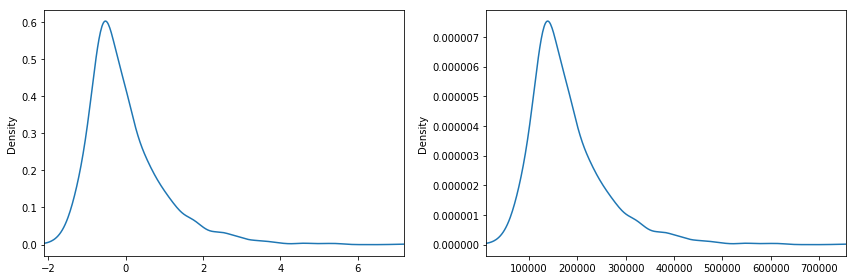

In [15]:
mean = houses['SalePrice'].mean()
std = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(lambda x: ((x - mean) / std))
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),houses['z_prices'].max()))
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),houses['SalePrice'].max()))
plt.tight_layout()

In [16]:
houses['z_area'] = houses['Lot Area'].apply(lambda x: ((x - houses['Lot Area'].mean()) / houses['Lot Area'].std(ddof = 0)))

In [17]:
z_mean_area = houses['z_area'].mean()
z_mean_area

8.771898641662927e-18

In [18]:
z_std_area = houses['z_area'].std(ddof=0)
z_std_area

0.9999999999999997

### The Standard Distribution

In [19]:
from numpy import std, mean

sample = [0,8,0,8]

standardized_sample = []

for s in sample:
    z = (s - mean(sample)) / std(sample, ddof = 1)
    standardized_sample.append(z)

In [20]:
mean_sample = mean(sample)    
mean_sample

4.0

In [21]:
std_sample = std(standardized_sample, ddof=1)
std_sample

1.0